In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv("Mental_Health_Data.csv")

In [3]:
df.head()

,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


In [4]:
'No' in df['tech_company'].values

True

In [5]:
df['tech_company'].unique()
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [6]:
df = df[df['tech_company'] != 'No']
df_new=df
df_new.rename(columns={'gender': 'Gender'}, inplace=True)


In [7]:
# Chi-square test
contingency_table = pd.crosstab(df_new['benefits'], df_new['mh_employer_discussion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test between 'benefits' and 'mh_employer_discussion'")
print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("✅ Result: Significant relationship (Reject Null Hypothesis)")
else:
    print("❌ Result: No significant relationship (Fail to Reject Null Hypothesis)")



Chi-square Test between 'benefits' and 'mh_employer_discussion'
Chi2 Value: 36.843743713532795
P-Value: 9.988095962792707e-09
Degrees of Freedom: 2
✅ Result: Significant relationship (Reject Null Hypothesis)


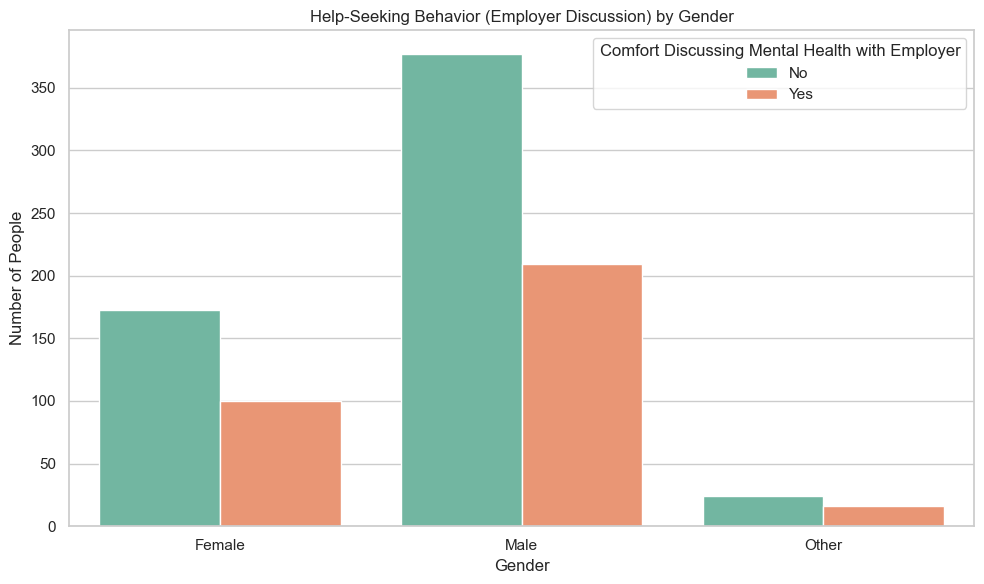

In [8]:
# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='mh_employer_discussion', data=df_new, palette='Set2')
plt.title('Help-Seeking Behavior (Employer Discussion) by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Comfort Discussing Mental Health with Employer')
plt.tight_layout()
plt.show()


In [9]:
filtered_df = df_new[df_new['mh_employer_discussion'] == 'Yes']
gender_total = filtered_df['Gender'].value_counts()
benefits_given = filtered_df[filtered_df['benefits'] == 'Yes']['Gender'].value_counts()

#Calculate Bayesian Probabilities
bayes_data = []

for gender in gender_total.index:
    P_B = gender_total[gender] / len(filtered_df)  
    P_A = len(filtered_df[filtered_df['benefits'] == 'Yes']) / len(filtered_df)  
    P_B_given_A = len(filtered_df[(filtered_df['benefits'] == 'Yes') & (filtered_df['Gender'] == gender)]) / len(filtered_df[filtered_df['benefits'] == 'Yes'])
    P_A_given_B = (P_B_given_A * P_A) / P_B  
    
    bayes_data.append({
        'Gender': gender,
        'P(Benefits | Gender ∩ SeekHelp)': round(P_A_given_B, 4)
    })
bayes_df = pd.DataFrame(bayes_data)
print(bayes_df)


   Gender  P(Benefits | Gender ∩ SeekHelp)
0    Male                           0.6746
1  Female                           0.8300
2   Other                           0.8750


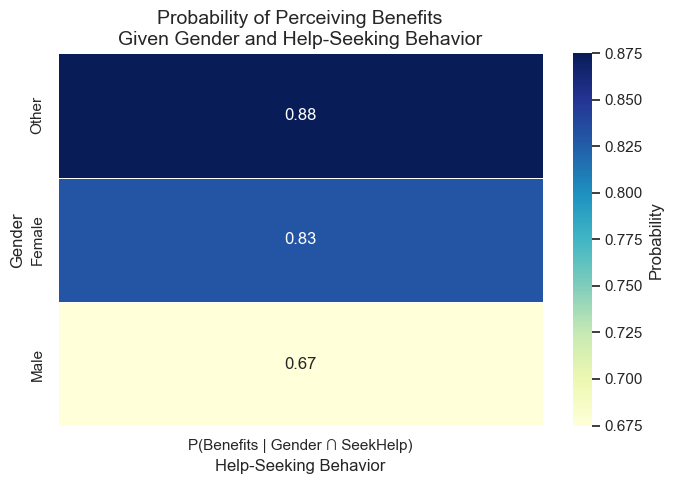

In [14]:
#Creating Heatmap
heatmap_df = bayes_df.set_index('Gender')
order=['Other','Female','Male']
heatmap_df=bayes_df.set_index('Gender').loc[order]

plt.figure(figsize=(7, 5))
sns.set(style='whitegrid')

ax = sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",        
    linewidths=0.5,
    annot_kws={"size": 12}
)

ax.set_xlabel("Help-Seeking Behavior", fontsize=12)
ax.set_ylabel("Gender", fontsize=12)

ax.set_title("Probability of Perceiving Benefits\nGiven Gender and Help-Seeking Behavior", fontsize=14)

colorbar = ax.collections[0].colorbar
colorbar.set_label("Probability", fontsize=12)

plt.tight_layout()
plt.show()
